   Unnamed: 0        match_name  Time [s] half_team        Time Min
0      140328  Slovenia_Denmark   5552.48        2H  1:32:32.480000
1      140340  Slovenia_Denmark   5552.96        2H  1:32:32.960000
2      140352  Slovenia_Denmark   5553.44        2H  1:32:33.440000
3      546228   Germany_Denmark   4627.84        2H  1:17:07.840000
4      426396    Denmark_Serbia   5611.00        2H         1:33:31
5       28776  Slovenia_Denmark   1151.04        1H  0:19:11.040000
6      538368   Germany_Denmark   4313.44        2H  1:11:53.440000
7      299904    Denmark_Serbia    609.60        1H  0:10:09.600000
8      299892    Denmark_Serbia    609.12        1H  0:10:09.120000
9      285864    Denmark_Serbia     48.00        1H         0:00:48
   Unnamed: 0        match_name  Time [s] half_team        Time Min  rating
0      140328  Slovenia_Denmark   5552.48        2H  1:32:32.480000       0
1      140340  Slovenia_Denmark   5552.96        2H  1:32:32.960000       0
2      140352  Slovenia_

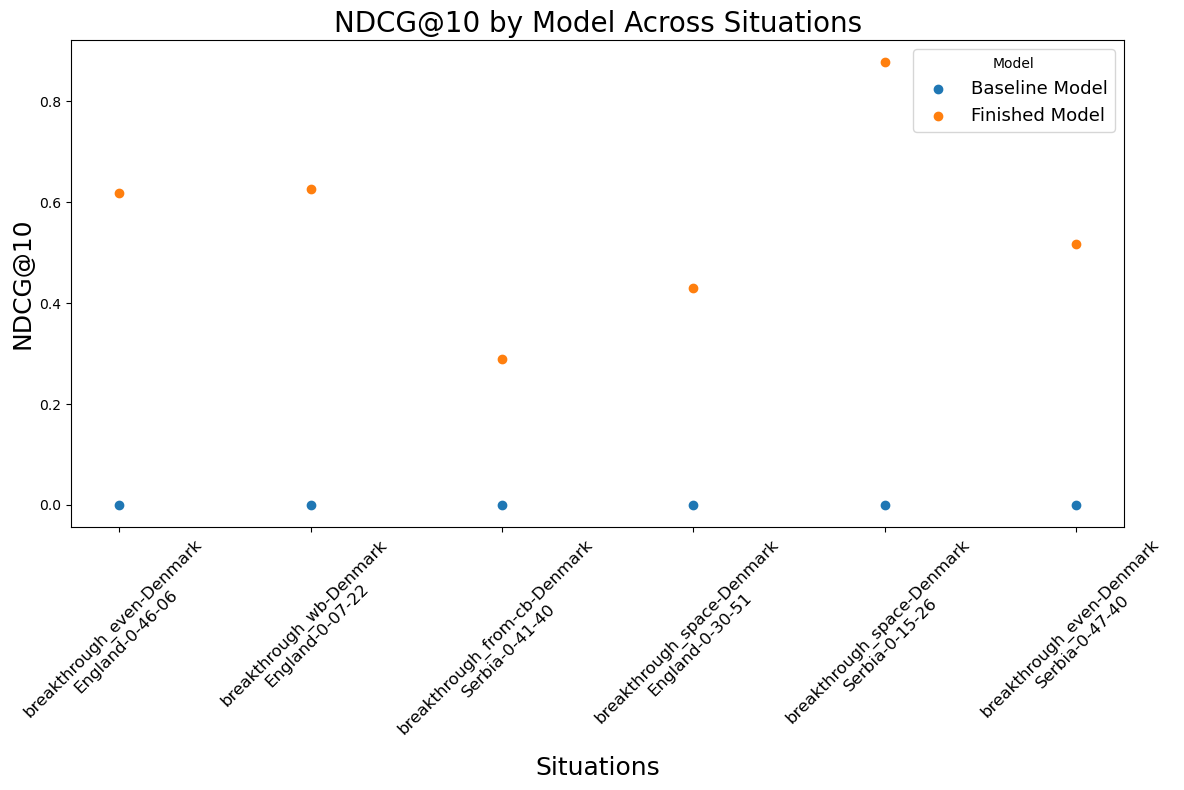

  Weighting Function   NDCG@10
0     Baseline Model  0.000000
1     Finished Model  0.559951


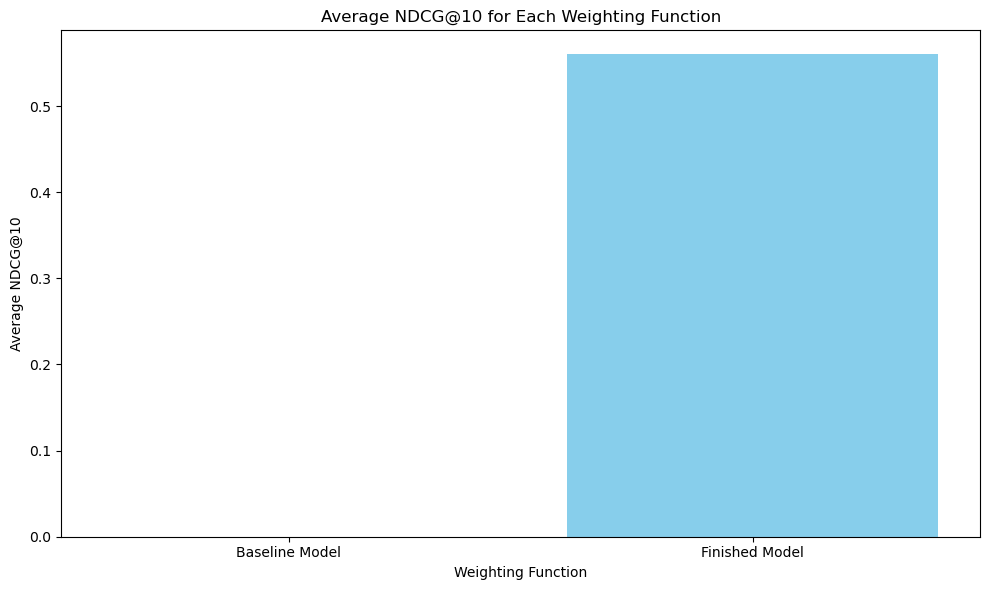

In [43]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Helper function to compute NDCG@K
def ndcg_at_k(ratings, k):
    """
    Calculate NDCG at K for a ranked list.
    :param ratings: List or array of relevance scores (e.g., [1, 0, 0, 1, 1]).
    :param k: Cutoff rank.
    :return: NDCG score at K.
    """
    ratings = np.asarray(ratings)[:k]
    dcg = np.sum(ratings / np.log2(np.arange(2, len(ratings) + 2)))
    ideal_ratings = np.sort(ratings)[::-1]
    idcg = np.sum(ideal_ratings / np.log2(np.arange(2, len(ideal_ratings) + 2)))
    return dcg / idcg if idcg > 0 else 0

# Helper function to extract weighting function from file name
def extract_weighting_function(file_name):
    print(file_name)

    if("Baseline" in file_name):
        return "Baseline Model"  # Assumes weighting function is the 3rd part of the file name
    
    if("Exp" in file_name):
        return "Finished Model"  # Assumes weighting function is the 3rd part of the file name
    
    if("Linear" in file_name):
        return "Linear"  # Assumes weighting function is the 3rd part of the file name
    
    if("Inverse" in file_name):
        return "Inverse"  # Assumes weighting function is the 3rd part of the file name
    

    if("Control" in file_name):
        return "Con"  # Assumes weighting function is the 3rd part of the file name






# Directory containing the CSV files
base_dir = "ranked_situations_lasse"  # Replace with the actual path
ground_truth_dir = "Ground_Truths_for_lasse"
# Placeholder for storing results
metrics = []

# Traverse the directory structure

for file in os.listdir(base_dir):
    for file_truth in os.listdir(ground_truth_dir):
        file_altered = "-".join(file.split("-")[:-3])
        file_for_key = "-".join(file.split("-")[1:-4])
    
        if file_altered in file_truth:
            file_path = os.path.join(base_dir, file)
            file_truth_path = os.path.join(ground_truth_dir, file_truth)
            
            df_1 = pd.read_csv(file_truth_path)
            df_2 = pd.read_csv(file_path)
            print(df_1)
            # Read the CSV file
            df = pd.merge(df_1,df_2,how="left")
            print(df.head())
            # Ensure there are enough rows
            if len(df) > 0:
                # Compute NDCG@10
                ndcg = ndcg_at_k(df["rating"].values, k=10)
                # Extract the weighting function from the file name
                weighting_function = extract_weighting_function(file_truth)
                # Store the metric
                metrics.append({
                    "Folder": os.path.basename(root),
                    "File": "breakthrough_"+("\n".join(file_for_key.split("_"))),
                    "Weighting Function": weighting_function,
                    "NDCG@10": ndcg
                })

# Convert metrics into a DataFrame
metrics_df = pd.DataFrame(metrics)

# Plot the results
plt.figure(figsize=(12, 8))
for function in metrics_df["Weighting Function"].unique():
    function_data = metrics_df[metrics_df["Weighting Function"] == function]
    plt.scatter(
        function_data["File"], 
        function_data["NDCG@10"], 
        marker="o", 
        label=function
    )
plt.xticks(fontsize = 12)


plt.xlabel("Situations", fontsize = 18)
plt.ylabel("NDCG@10", fontsize = 18)
plt.title("NDCG@10 by Model Across Situations", fontsize=20)
plt.legend(title="Model", fontsize =13)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Compute average NDCG@10 for each weighting function
average_scores = metrics_df.groupby("Weighting Function")["NDCG@10"].mean().reset_index()
print(average_scores)

# Plot average NDCG@10 for each weighting function
plt.figure(figsize=(10, 6))
plt.bar(
    average_scores["Weighting Function"], 
    average_scores["NDCG@10"], 
    color="skyblue"
)
plt.xlabel("Weighting Function")
plt.ylabel("Average NDCG@10")
plt.title("Average NDCG@10 for Each Weighting Function")
plt.tight_layout()
plt.show()

In [27]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Directory containing the CSV files
base_dir = "ranked_situations_lasse"  # Replace with the actual path

# Placeholder for storing results
metrics = []

# Traverse the directory structure
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if "ranked" in file and file.endswith(".csv"):
            file_path = os.path.join(root, file)
            
            # Read the CSV file
            df = pd.read_csv(file_path)
            
            # Ensure there are rows to process
            if len(df) > 0:
                
                # Count the number of correct recommendations (e.g., ratings > 0)
                correct_recommendations = (df["rating"] > 0).sum()
                
                # Extract the weighting function from the file name
                weighting_function = extract_weighting_function(file)
                
                # Store the metric
                metrics.append({
                    "Folder": os.path.basename(root),
                    "File": file,
                    "Weighting Function": weighting_function,
                    "Correct Recommendations": correct_recommendations
                })

# Convert metrics into a DataFrame
metrics_df = pd.DataFrame(metrics)

# Plot the results
plt.figure(figsize=(12, 8))
for function in metrics_df["Weighting Function"].unique():
    function_data = metrics_df[metrics_df["Weighting Function"] == function]
    plt.plot(
        function_data["Folder"], 
        function_data["Correct Recommendations"], 
        marker="o", 
        label=function
    )

plt.xlabel("Folders")
plt.ylabel("Correct Recommendations")
plt.title("Correct Recommendations by Weighting Function Across Situations")
plt.legend(title="Weighting Function")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Compute average number of correct recommendations for each weighting function
average_scores = metrics_df.groupby("Weighting Function")["Correct Recommendations"].mean().reset_index()
print(average_scores)

# Plot average correct recommendations for each weighting function
plt.figure(figsize=(10, 6))
plt.bar(
    average_scores["Weighting Function"], 
    average_scores["Correct Recommendations"], 
    color="skyblue"
)
plt.xlabel("Weighting Function")
plt.ylabel("Average Correct Recommendations")
plt.title("Average Correct Recommendations for Each Weighting Function")
plt.tight_layout()
plt.show()


KeyError: 'Weighting Function'

<Figure size 1200x800 with 0 Axes>